In [5]:
import pandas as pd
import numpy as np

# Load the CSV file
file_path = 'C:/Users/jamiy/Documents/Análisis/PLFA Analysis/tpca.csv'
data = pd.read_csv(file_path, encoding='latin1')
# Observacion de los primeros datos del DataFrame
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tratamiento  27 non-null     object 
 1   Gram -       27 non-null     float64
 2   Gram +       27 non-null     float64
 3   HMA          27 non-null     float64
 4   Hongos       27 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


(None,
   Tratamiento    Gram -    Gram +        HMA     Hongos
 0     Control  3.918640  6.797413   8.443334  23.071966
 1     Control  3.260513  0.000000   3.526785   8.659662
 2     Control  6.876350  4.602694  22.852394  12.988099
 3     Control  3.663688  8.094736   3.130228   9.281212
 4     Control  4.188430  0.521188   0.793190   3.437246)

In [6]:
# Importar librerias

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Ejecutar ANOVA para cada variable del analisis PLFA
anova_results = {}
for column in data.columns[1:]:
    anova_results[column] = stats.f_oneway(
        *(data[data['Tratamiento'] == treatment][column] for treatment in data['Tratamiento'].unique())
    )

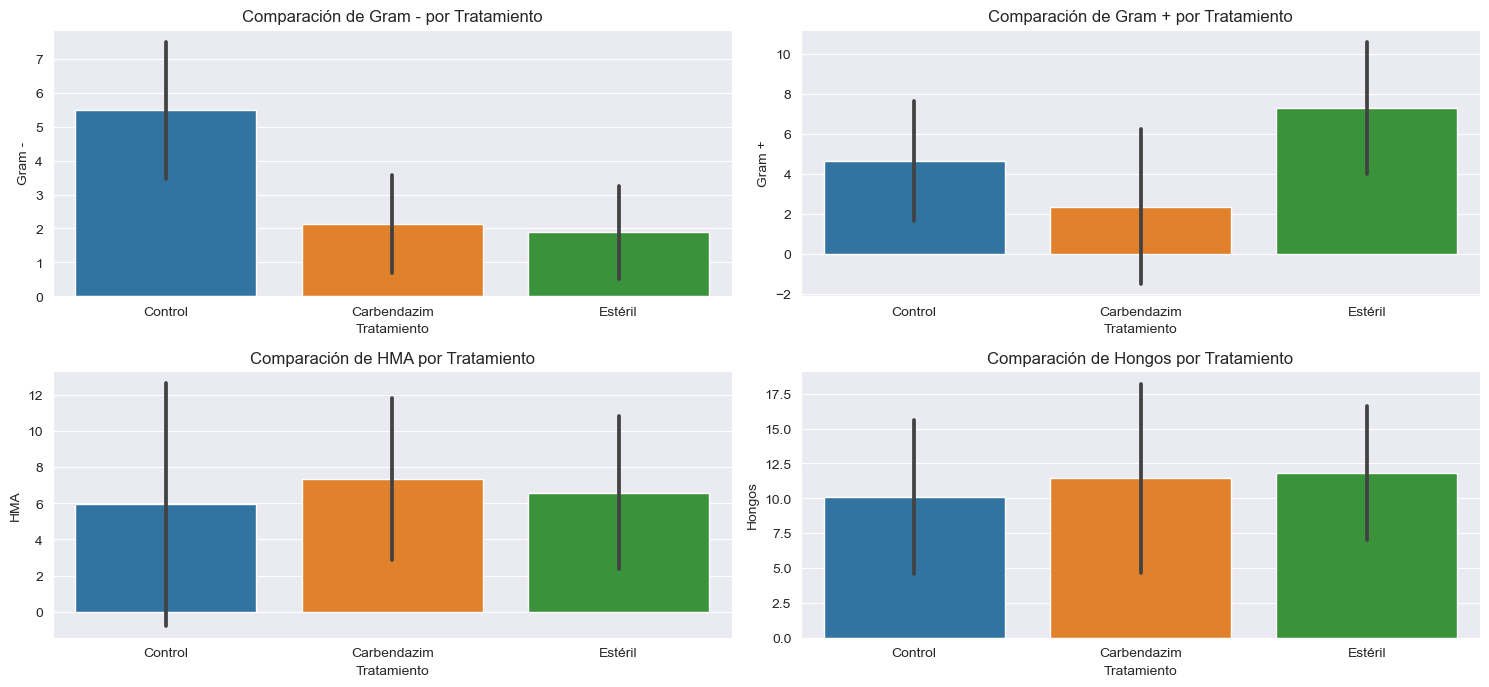

{'Gram -': F_onewayResult(statistic=13.651493715421724, pvalue=0.00010985581158152582),
 'Gram +': F_onewayResult(statistic=4.749097621922346, pvalue=0.018292707340089084),
 'HMA': F_onewayResult(statistic=0.16096434408306917, pvalue=0.8522338324186627),
 'Hongos': F_onewayResult(statistic=0.22310506608213806, pvalue=0.8016714448086499)}

In [7]:
# Graficar Barplots para los test ANOVA
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[1:], 1):
    plt.subplot(3, 2, i)
    sns.barplot(x='Tratamiento', y=column, data=data, errorbar='sd')
    plt.title(f'Comparación de {column} por Tratamiento')
    plt.ylabel(column)
    plt.xlabel('Tratamiento')

plt.tight_layout()
plt.show()
anova_results

In [8]:
# Librerias para correr PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Estandarizacion de datos

features = data.columns[1:]
x = data[features].values
x = StandardScaler().fit_transform(x)

# Ejecutar PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df = pd.concat([pca_df, data[['Tratamiento']]], axis=1)

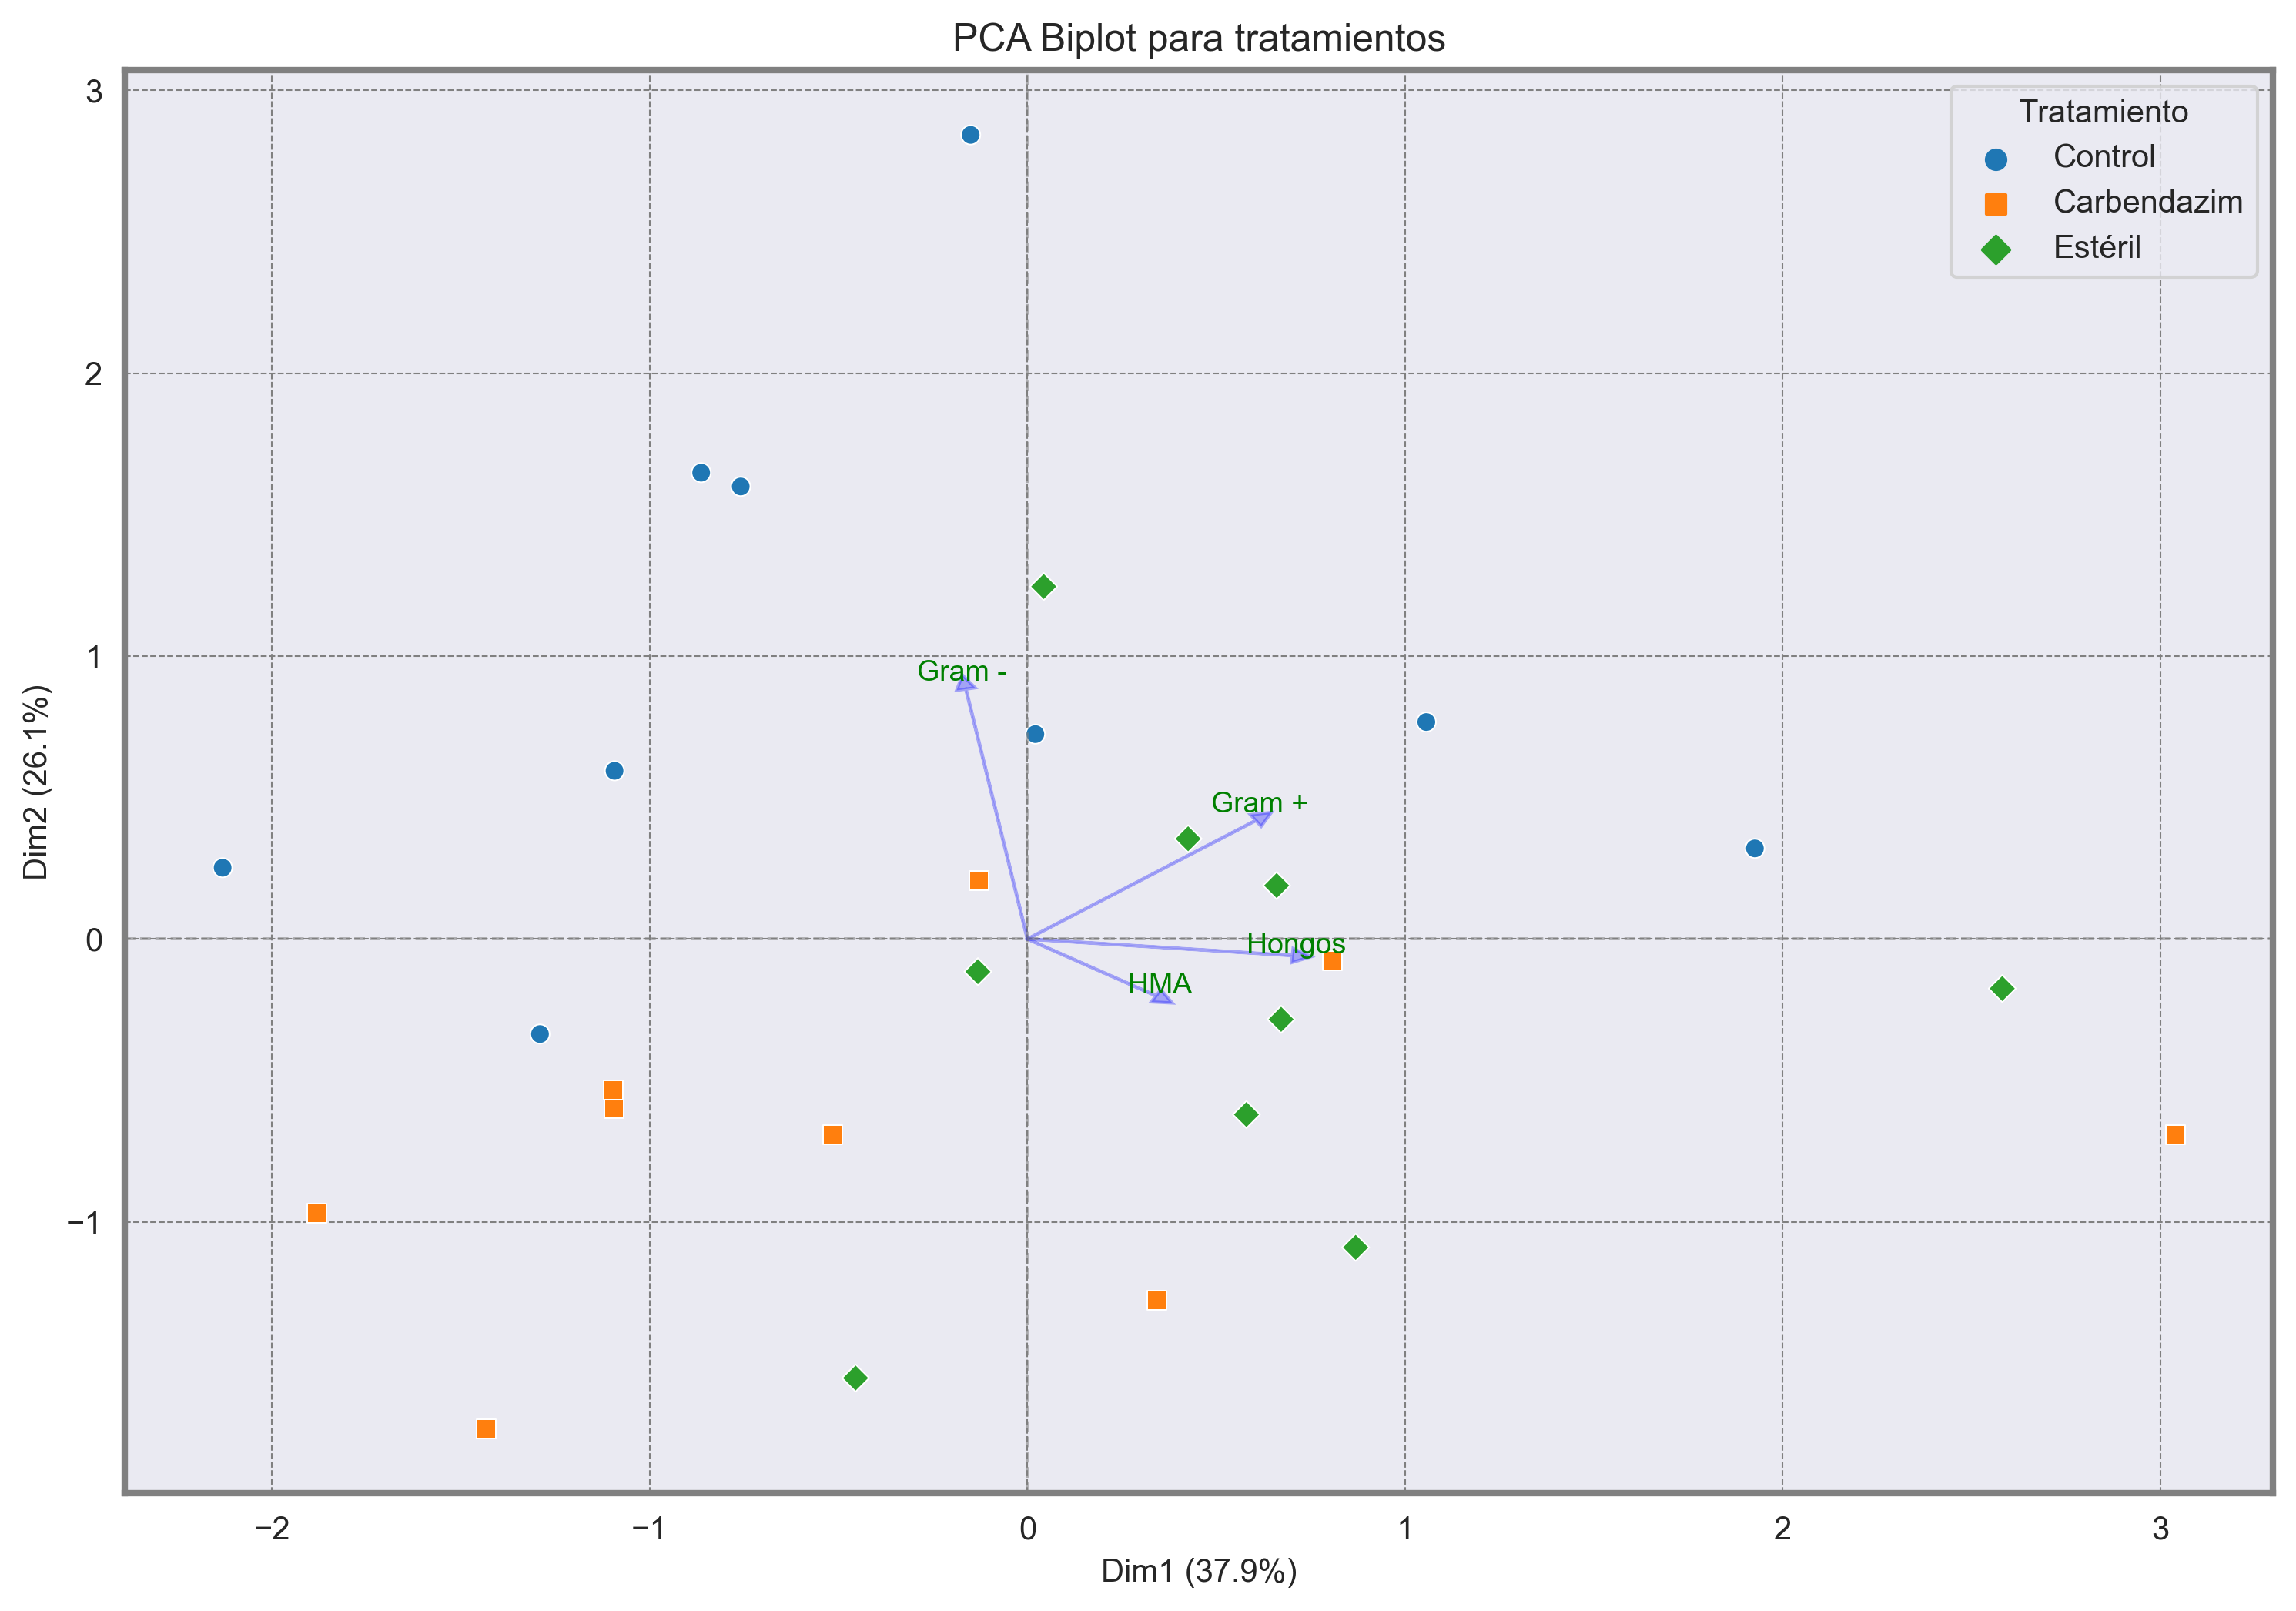

In [9]:
plt.figure(figsize=(12, 8), dpi=300)

# Definir el mapa de estilos
markers = {'Control': 'o', 'Carbendazim': 's', 'Estéril': 'D'}

# Crear el biplot con diferentes estilos de puntos y tamaños según 'Valor'
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Tratamiento', style='Tratamiento', markers=markers)

# Plot the vectors of the original features
for i, feature in enumerate(features):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
              color='b', alpha=0.3, head_width=0.05, head_length=0.05)

    # Apply a small offset to the label to prevent overlap
    offset = np.sign(pca.components_[:, i]) * 0.01
    plt.text(pca.components_[0, i] + offset[0], pca.components_[1, i] + offset[1], feature,
             color='g', ha='center', va='bottom', fontsize=9)

plt.xlabel(f'Dim1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'Dim2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('PCA Biplot para tratamientos')

# Activa cuadricula
plt.grid(True)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Para visualizar marco
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

ax.spines['top'].set_linewidth(2)  # Grosor del marco superior
ax.spines['top'].set_color('gray')  # Color del marco superior
ax.spines['right'].set_linewidth(2)  # Grosor del marco derecho
ax.spines['right'].set_color('gray')  # Color del marco derecho
ax.spines['left'].set_linewidth(2)  # Grosor del marco izquierdo
ax.spines['left'].set_color('gray')  # Color del marco izquierdo
ax.spines['bottom'].set_linewidth(2)  # Grosor del marco inferior
ax.spines['bottom'].set_color('gray')  # Color del marco inferior

plt.axhline(0, linestyle='--', linewidth=0.9, alpha=0.6, color='gray')
plt.axvline(0, linestyle='--', linewidth=0.9, alpha=0.6, color='gray')
plt.savefig('PCA Total Samples.png', transparent = True, dpi = 450);

# Mostrar el gráfico
plt.show()